In [1]:
import numpy as np
import scipy.constants as constants
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas as pd

import blackbody as bb
import detailedbalance as db
import plots as plots

#font = {'size' : 14}

matplotlib.rc('font',**{'size' : 16})
%matplotlib inline

In [2]:
# Just some constants for the upcoming math
c = constants.value('speed of light in vacuum')
h = constants.value('Planck constant in eV s')
e = constants.value('elementary charge')
k = constants.value('Boltzmann constant in eV/K')

pi = 3.1415

# Globals
Tcell = 300  # Kelvin
# Energy Gap
Egap = 1.1  #electron volts
#Solar dimensions, used to calculate solid angle of earth wrt sun, which is used in sq limit, or for sanity checking
r_earth = 6e6
r_sun = 6.95e8
d_sun = 1.50e11

In [24]:
settingsdict = {
    "Solar": {
        "Temp": 5750,
        'solidangle' : bb.solid_angle_sun(r_earth,d_sun),
        'emitterarea' : 4*pi*r_sun**2,
        'absorberarea' : pi*r_earth**2
    },
    "1800_flat": {
        "Temp": 1800,
        'solidangle' : 2*pi,
        'emitterarea' : 1,
        'absorberarea' : 1
    },
    "1800_cam": {
        "Temp": 1800,
        'solidangle' : 0.2*pi,
        'emitterarea' : 1,
        'absorberarea' : 1
    }    
    
}

constants = settingsdict['Solar']

In [25]:
E_ph = np.arange(0.01, 10,0.001) 
E_ph = np.flip(E_ph,0)
    
emissivity = bb.stepfn(1,1,1.1,E_ph)
#emissivity = bb.stepfn(10**-10,10**-30,1.1,E_ph)
#emissivity = bb.lorentzian(0,1,1.5,0.1,E_ph)

BB = bb.rad_blackbody(E_ph,constants)
BB = BB * emissivity

#check integrated irradiance is ~1kW/m^2
# integrate = -np.trapz(BB,BB.index )
# print(integrate)

BB_ph = bb.power_to_photons(BB)

#print(bb.stephan(5750)*4*pi*r_sun**2)


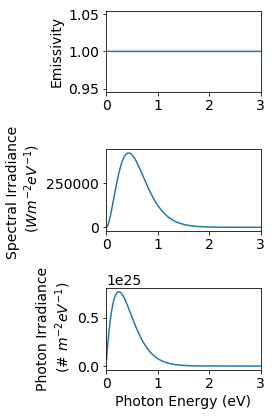

In [26]:
plots.em_ir_ph_plot(BB, BB_ph, emissivity)

In [11]:
PAG = db.photons_above_bandgap(1.1,BB_ph)
detectorarea = (5e-6)*2
photonrate = PAG*detectorarea
qe = 1
exposuretime= 10e-3
es = qe*photonrate*exposuretime
es

2396659357424168.0

(0, 3)

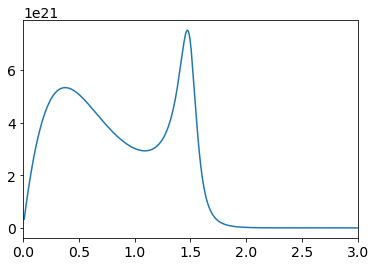

In [12]:
filt_wl = 1240/450
filt = bb.lorentzian(0.1,1,filt_wl,0.01,E_ph)

plt.plot(E_ph, filt*BB_ph)
plt.xlim(0,3)

In [ ]:

E_gaps = np.arange(0.3, 5,0.01) 
E_gaps = np.flip(E_gaps,0)
